In [47]:
import numpy as np
import pandas as pd
df = pd.read_csv('metro_CA_2011_2018_lagged_genindex.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['rent_in_5y', 'rent_in_4y', 'rent_in_3y', 'rent_in_2y'])
df[df == np.inf] = np.nan
df = df.fillna(method='ffill')
df.isnull().sum()

year                                            0
aggregate_travel_time_to_work                   0
amerindian_including_hispanic                   0
amerindian_pop                                  0
armed_forces                                    0
                                               ..
different_house_year_ago_all_pct_change         0
rank_different_house_year_ago_all_pct_change    0
rank_gini_index                                 0
gini_index_pct_change                           0
gen_rank                                        0
Length: 262, dtype: int64

In [48]:
#prepare data to modeling 
features_test = df.loc[df['year'] == 2018]
features_train = df.loc[df['year'] != 2018]
labels_train = features_train['rent_in_1y']
labels_test = features_test['rent_in_1y']
features_train = features_train.drop('rent_in_1y', axis = 1)
features_test = features_test.drop('rent_in_1y', axis = 1)

In [49]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(features_train, labels_train);

In [50]:
rf.score(features_train, labels_train)

0.997611414237112

In [51]:
rf.score(features_test, labels_test)

0.9882326408432108

<BarContainer object of 20 artists>

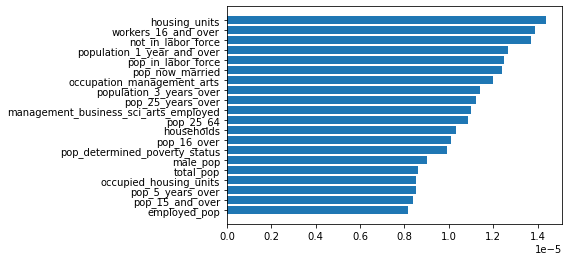

In [65]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(features_test.columns[sorted_idx][:20], rf.feature_importances_[sorted_idx][:20])

In [67]:
features_train.to_csv('features_train_metro_lagged.csv', index=False)
features_test.to_csv('features_test_metro_lagged.csv', index=False)
labels_train.to_csv('labels_train_metro_lagged.csv', index=False)
labels_test.to_csv('labels_test_metro_lagged.csv', index=False)

In [68]:
data = pd.read_csv('data_final_for_real.csv')
data = data.drop(columns=['rent_in_2y', 'rent_in_3y', 'rent_in_4y', 'rent_in_5y'])
data = data.drop(columns=['zipcode', 'City', 'CountyName', 'Metro', 'CSBA'])
data = data.dropna()
data

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,...,gen_rank,CSBA,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,...,533.000000,41860.0,10922.0,7263.0,3659.0,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667
1,2014,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4123.250000,0.028940,0.141141,0.097703,0.127501,...,254.333333,41860.0,10001.0,6285.0,3716.0,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333
2,2015,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4520.250000,0.029400,0.135949,0.105821,0.123141,...,239.666667,41860.0,13386.0,8582.0,4804.0,4492.916667,4231.416667,4245.916667,4421.083333,4406.000000
3,2016,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4492.916667,0.027901,0.146379,0.105018,0.120388,...,303.333333,41860.0,14787.0,9820.0,4967.0,4231.416667,4245.916667,4421.083333,4406.000000,NaN
4,2017,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4231.416667,0.026190,0.131302,0.108329,0.122007,...,346.666667,41860.0,16952.0,12175.0,4777.0,4245.916667,4421.083333,4406.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,2014,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1186.333333,0.044218,0.000000,0.000000,0.214286,...,NaN,40140.0,10166.0,2944.0,7222.0,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545
4580,2015,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1238.666667,0.045296,0.000000,0.000000,0.216028,...,NaN,40140.0,9926.0,2110.0,7816.0,1308.666667,1414.833333,1456.000000,1332.454545,1356.000000
4581,2016,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1308.666667,0.051948,0.000000,0.000000,0.207792,...,NaN,40140.0,10921.0,2084.0,8837.0,1414.833333,1456.000000,1332.454545,1356.000000,NaN
4582,2017,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1414.833333,0.056034,0.000000,0.000000,0.176724,...,NaN,40140.0,14676.0,3721.0,10955.0,1456.000000,1332.454545,1356.000000,NaN,NaN


In [83]:
#prepare data to modeling 
features_test = data.loc[data['year'] == 2018]
features_train = data.loc[data['year'] != 2018]
labels_train = features_train['rent_in_1y']
labels_test = features_test['rent_in_1y']
features_train = features_train.drop('rent_in_1y', axis = 1)
features_test = features_test.drop('rent_in_1y', axis = 1)

In [84]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(features_train, labels_train);

In [85]:
rf.score(features_train, labels_train)

0.9986423847582738

In [86]:
rf.score(features_test, labels_test)

0.9858113508577235

<BarContainer object of 20 artists>

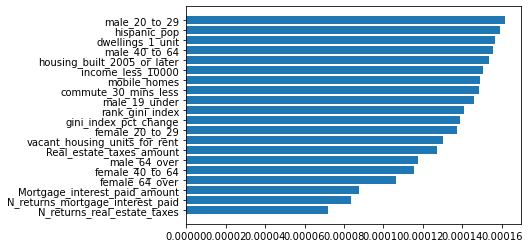

In [87]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(features_test.columns[sorted_idx][:20], rf.feature_importances_[sorted_idx][:20])

In [88]:
features_train = features_train.drop('avg_rent', axis = 1)
features_test = features_test.drop('avg_rent', axis = 1)

In [89]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(features_train, labels_train);

In [90]:
rf.score(features_train, labels_train)

0.9923820842902287

In [91]:
rf.score(features_test, labels_test)

0.8798395007926294

<BarContainer object of 20 artists>

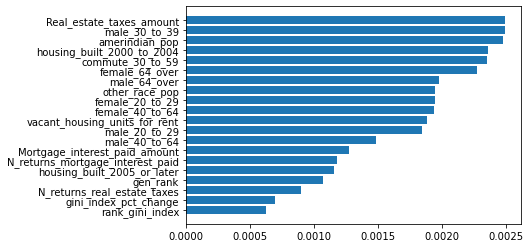

In [82]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(features_test.columns[sorted_idx][:20], rf.feature_importances_[sorted_idx][:20])